In [497]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [498]:
data = pd.read_csv("neo.csv")

In [499]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [500]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [501]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [502]:
data.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [503]:
for i in ["orbiting_body","sentry_object","hazardous"]:
    print(i)
    print(data[i].value_counts())

orbiting_body
Earth    90836
Name: orbiting_body, dtype: int64
sentry_object
False    90836
Name: sentry_object, dtype: int64
hazardous
False    81996
True      8840
Name: hazardous, dtype: int64


In [504]:
data.drop(columns=["id","name","orbiting_body","sentry_object"], inplace=True)

In [505]:
data.select_dtypes(include="number").columns

Index(['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'],
      dtype='object')

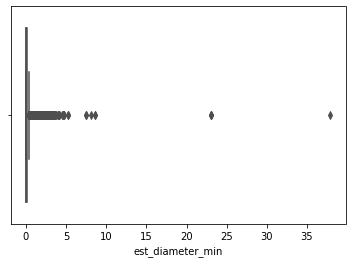

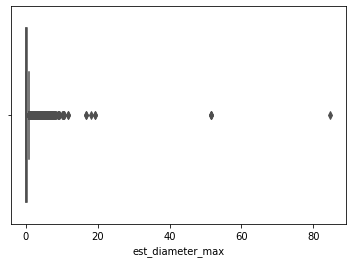

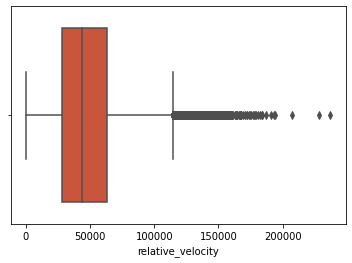

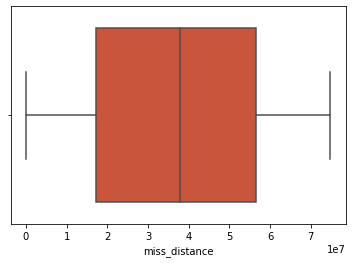

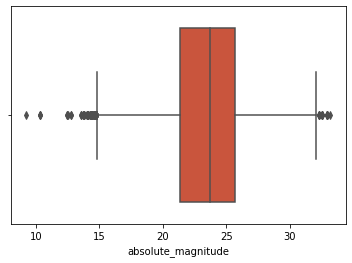

In [506]:
for i in ['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude']:
       plt.subplots()
       sns.boxplot(x=i, data=data, color="#E14625")
       plt.show()

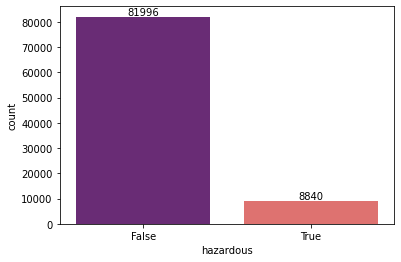

In [507]:
haz = sns.countplot(x="hazardous", data=data, palette="magma")
haz.bar_label(haz.containers[0])
plt.show()

In [508]:
X = data.drop(columns="hazardous")
Y = data["hazardous"]

In [509]:
# Splitting the data into Training & Testing
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y)

In [510]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape) 
print(yTest.shape)

(68127, 5)
(22709, 5)
(68127,)
(22709,)


In [511]:
# Importing metrics
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

In [512]:
results = pd.DataFrame(columns=["Model","TrainScore","TestScore","PrecisionTrue", "RecalTrue"])

In [513]:
import warnings
warnings.filterwarnings("ignore")

In [514]:
# Defining a function for metrics.
# Logistic Regression
# GaussianNB
# DecisionTreeClassifier
# RandomForestClassifier
# KNN
# SVC
# XGB
def classificationmodel(test):
    test.fit(xTrain, yTrain)
    scoretrain = test.score(xTrain, yTrain)
    scoretest = test.score(xTest, yTest)
    print("Score of the training dataset:", test.score(xTrain, yTrain))
    print("Score of the testing dataset:", test.score(xTest, yTest), "\n")
    print("Classification report on Testing split:")
    print(classification_report(yTest, test.predict(xTest)))
    plot_confusion_matrix(test, xTest, yTest)
    if len(results.index) == 0:
        results.loc[len(results.index)] = ["LR", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 1:
        results.loc[len(results.index)] = ["GNB", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 2:
        results.loc[len(results.index)] = ["DTC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 3:
        results.loc[len(results.index)] = ["RFC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 4:
        results.loc[len(results.index)] = ["KNN", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 5:
        results.loc[len(results.index)] = ["GBC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 6:
        results.loc[len(results.index)] = ["XGB", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]

def crossval(m):
    print("Cross-validation on Training split (mean):")
    for i in ["precision","accuracy","recall"]:
        print(i.upper())
        print(cross_val_score(m, xTrain, yTrain, scoring=i).mean())
    print("\n")

Cross-validation on Training split (mean):
PRECISION
0.0
ACCURACY
0.9031661467485931
RECALL
0.0


Score of the training dataset: 0.9031661455810471
Score of the testing dataset: 0.9012285877845788 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95     20466
        True       0.00      0.00      0.00      2243

    accuracy                           0.90     22709
   macro avg       0.45      0.50      0.47     22709
weighted avg       0.81      0.90      0.85     22709



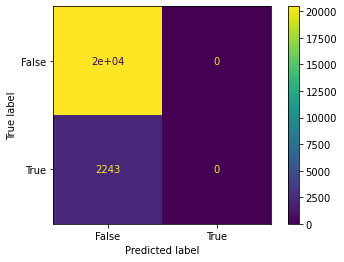

In [515]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
crossval(LR)
classificationmodel(LR)

Cross-validation on Training split (mean):
PRECISION
0.2714649828023895
ACCURACY
0.897133309902682
RECALL
0.03653031451742597


Score of the training dataset: 0.8971332951693162
Score of the testing dataset: 0.8955039852041041 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94     20466
        True       0.29      0.04      0.07      2243

    accuracy                           0.90     22709
   macro avg       0.59      0.51      0.51     22709
weighted avg       0.84      0.90      0.86     22709



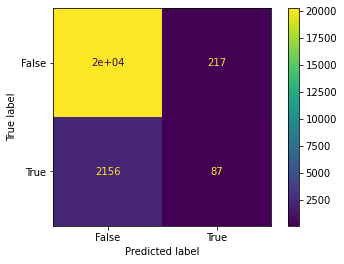

In [516]:
from sklearn.naive_bayes import GaussianNB
GSS = GaussianNB()
crossval(GSS)
classificationmodel(GSS)

# Over sampling data using RandomOverSampler

In [517]:
results = pd.DataFrame(columns=["Model","TrainScore","TestScore","PrecisionTrue","RecalTrue"])

In [518]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="minority")

xTrain, yTrain = ros.fit_resample(xTrain, yTrain)

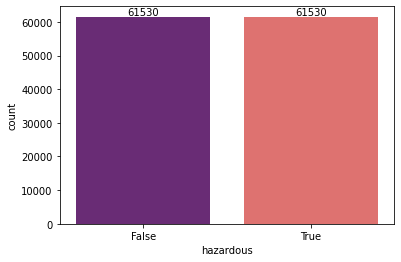

In [519]:
haz = sns.countplot(x=yTrain, palette="magma")
haz.bar_label(haz.containers[0])
plt.show()

Cross-validation on Training split (mean):
PRECISION
0.5521093712016533
ACCURACY
0.572013651877133
RECALL
0.7630749228018852


Score of the training dataset: 0.571940516821063
Score of the testing dataset: 0.4202739002157735 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.93      0.39      0.55     20466
        True       0.12      0.74      0.20      2243

    accuracy                           0.42     22709
   macro avg       0.52      0.56      0.37     22709
weighted avg       0.85      0.42      0.51     22709



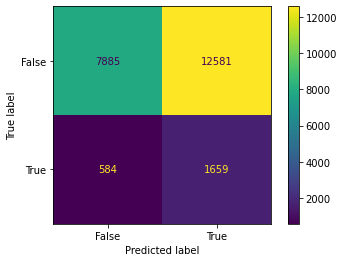

In [520]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.model_selection import cross_val_score
crossval(LR)
classificationmodel(LR)

Cross-validation on Training split (mean):
PRECISION
0.6374610065717268
ACCURACY
0.613481228668942
RECALL
0.5262311067771819


Score of the training dataset: 0.6133837152608483
Score of the testing dataset: 0.6766480250121097 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.93      0.70      0.80     20466
        True       0.15      0.50      0.23      2243

    accuracy                           0.68     22709
   macro avg       0.54      0.60      0.51     22709
weighted avg       0.85      0.68      0.74     22709



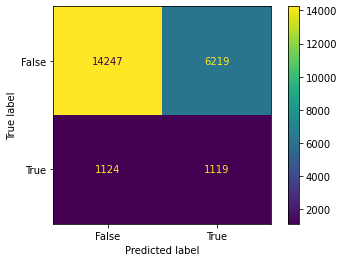

In [521]:
from sklearn.naive_bayes import GaussianNB
GSS = GaussianNB()
crossval(GSS)
classificationmodel(GSS)

Cross-validation on Training split (mean):
PRECISION
0.9387480643211518
ACCURACY
0.9674467739314154
RECALL
0.9999837477653177


Score of the training dataset: 1.0
Score of the testing dataset: 0.8939187106433573 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     20466
        True       0.46      0.43      0.45      2243

    accuracy                           0.89     22709
   macro avg       0.70      0.69      0.69     22709
weighted avg       0.89      0.89      0.89     22709



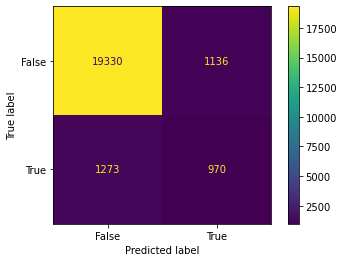

In [522]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
crossval(DTR)
classificationmodel(DTR)

Score of the training dataset: 1.0
Score of the testing dataset: 0.9067330133427276 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     20466
        True       0.53      0.52      0.52      2243

    accuracy                           0.91     22709
   macro avg       0.74      0.74      0.74     22709
weighted avg       0.91      0.91      0.91     22709



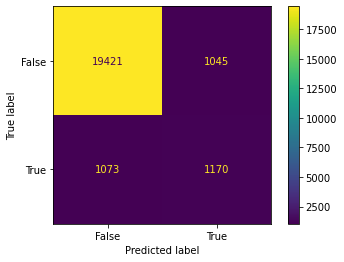

In [523]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
# crossval(RFC)
classificationmodel(RFC)

Score of the training dataset: 0.9167966845441248
Score of the testing dataset: 0.7287419084944295 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.92      0.77      0.84     20466
        True       0.15      0.36      0.21      2243

    accuracy                           0.73     22709
   macro avg       0.53      0.56      0.52     22709
weighted avg       0.84      0.73      0.77     22709



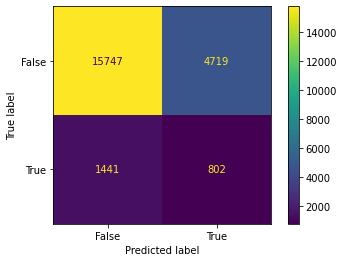

In [524]:
from sklearn.neighbors import KNeighborsClassifier
KNNC = KNeighborsClassifier()
# crossval(KNNC)
classificationmodel(KNNC)

Score of the training dataset: 0.8796115715910938
Score of the testing dataset: 0.7888062001849487 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       1.00      0.77      0.87     20466
        True       0.32      0.98      0.48      2243

    accuracy                           0.79     22709
   macro avg       0.66      0.87      0.67     22709
weighted avg       0.93      0.79      0.83     22709



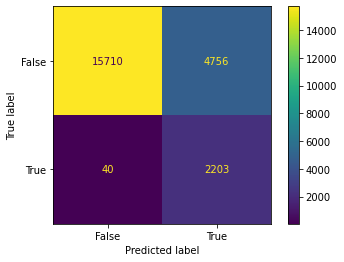

In [525]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
#crossval(GBC)
classificationmodel(GBC)

Score of the training dataset: 0.907801072647489
Score of the testing dataset: 0.8198511603329076 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.99      0.81      0.89     20466
        True       0.35      0.93      0.50      2243

    accuracy                           0.82     22709
   macro avg       0.67      0.87      0.70     22709
weighted avg       0.93      0.82      0.85     22709



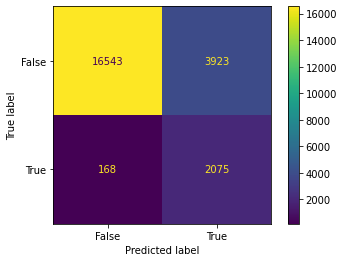

In [526]:
from xgboost import XGBClassifier
XGB = XGBClassifier(eval_metric='mlogloss')
# #crossval(XGB)
classificationmodel(XGB)

In [527]:
results

,Model,TrainScore,TestScore,PrecisionTrue,RecalTrue
0,LR,0.571941,0.420274,0.116503,0.739634
1,GNB,0.613384,0.676648,0.152494,0.498885
2,DTC,1.000000,0.893919,0.460589,0.432457
3,RFC,1.000000,0.906733,0.528217,0.521623
4,KNN,0.916797,0.728742,0.145264,0.357557
5,GBC,0.879612,0.788806,0.316568,0.982167
6,XGB,0.907801,0.819851,0.345949,0.925100


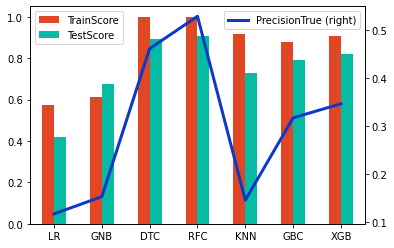

In [528]:
results[["TrainScore","TestScore"]].plot(kind="bar", color=["#E14625","#06BBA3"])
plt.xticks(range(0,len(results["Model"])), results["Model"])
results["PrecisionTrue"].plot(c="#0E38CA", linewidth=3, secondary_y=True, label="PrecisionTrue")
plt.legend()
plt.show()

In [529]:
# Changing max_depth to avoid overfitting.
DTC2 = DecisionTreeClassifier(max_depth=32)
DTC2.fit(xTrain, yTrain)
print("Score of training dataset:",DTC2.score(xTrain, yTrain))
print("Score of testing dataset:",DTC2.score(xTest, yTest))
print(classification_report(yTest, DTC2.predict(xTest)))
results.loc[len(results.index)] = ["DTC2", DTC2.score(xTrain, yTrain), DTC2.score(xTest, yTest), precision_score(y_true=yTest, y_pred=DTC2.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=DTC2.predict(xTest), pos_label=True)]

Score of training dataset: 0.9724605883308955
Score of testing dataset: 0.8670571139195914
              precision    recall  f1-score   support

       False       0.95      0.90      0.92     20466
        True       0.38      0.55      0.45      2243

    accuracy                           0.87     22709
   macro avg       0.66      0.73      0.69     22709
weighted avg       0.89      0.87      0.88     22709



In [530]:
# Changing max_depth to avoid overfitting.
RFC2 = RandomForestClassifier(max_depth=32)
RFC2.fit(xTrain, yTrain)
print("Score of training dataset:",RFC2.score(xTrain, yTrain))
print("Score of testing dataset:",RFC2.score(xTest, yTest))
print(classification_report(yTest, RFC2.predict(xTest)))
results.loc[len(results.index)] = ["RFC2", RFC2.score(xTrain, yTrain), RFC2.score(xTest, yTest), precision_score(y_true=yTest, y_pred=RFC2.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=RFC2.predict(xTest), pos_label=True)]

Score of training dataset: 0.9925889809848855
Score of testing dataset: 0.8925536131049364
              precision    recall  f1-score   support

       False       0.96      0.92      0.94     20466
        True       0.47      0.60      0.53      2243

    accuracy                           0.89     22709
   macro avg       0.71      0.76      0.73     22709
weighted avg       0.91      0.89      0.90     22709



In [531]:
results

,Model,TrainScore,TestScore,PrecisionTrue,RecalTrue
0,LR,0.571941,0.420274,0.116503,0.739634
1,GNB,0.613384,0.676648,0.152494,0.498885
2,DTC,1.000000,0.893919,0.460589,0.432457
3,RFC,1.000000,0.906733,0.528217,0.521623
4,KNN,0.916797,0.728742,0.145264,0.357557
5,GBC,0.879612,0.788806,0.316568,0.982167
6,XGB,0.907801,0.819851,0.345949,0.925100
7,DTC2,0.972461,0.867057,0.380615,0.551494
8,RFC2,0.992589,0.892554,0.466070,0.603210


Score of the training dataset: 0.9389484804160572
Score of the testing dataset: 0.8412083314985248 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.98      0.84      0.91     20466
        True       0.37      0.83      0.51      2243

    accuracy                           0.84     22709
   macro avg       0.67      0.84      0.71     22709
weighted avg       0.92      0.84      0.87     22709



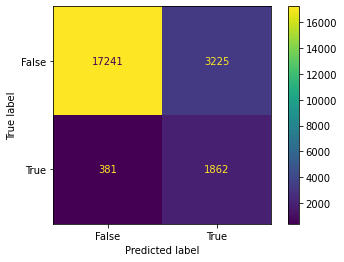

In [532]:
RFC3 = RandomForestClassifier(max_depth=32, class_weight={False:0.1,True:0.9})
classificationmodel(RFC3)

Score of the training dataset: 0.9978303266699171
Score of the testing dataset: 0.9083182879034744 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     20466
        True       0.54      0.52      0.53      2243

    accuracy                           0.91     22709
   macro avg       0.74      0.74      0.74     22709
weighted avg       0.91      0.91      0.91     22709



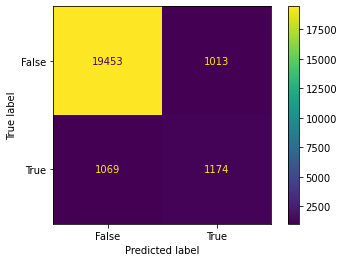

In [533]:
RFC4 = RandomForestClassifier(max_depth=32, class_weight={False:0.9,True:0.1})
classificationmodel(RFC4)

Score of the training dataset: 0.9917926214854542
Score of the testing dataset: 0.8917609758245629 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.96      0.92      0.94     20466
        True       0.46      0.62      0.53      2243

    accuracy                           0.89     22709
   macro avg       0.71      0.77      0.73     22709
weighted avg       0.91      0.89      0.90     22709



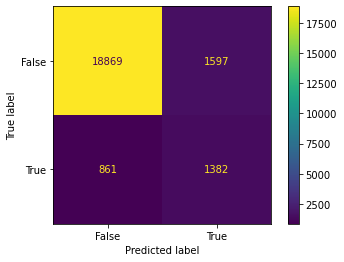

In [534]:
RFC5 = RandomForestClassifier(max_depth=32, class_weight="balanced_subsample")
classificationmodel(RFC5)

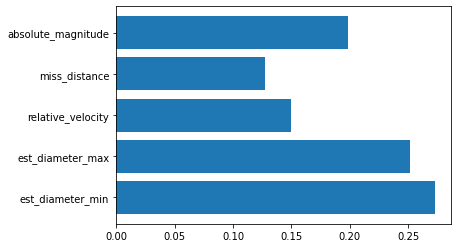

In [535]:
plt.barh(RFC5.feature_names_in_, RFC5.feature_importances_)
plt.show()

In [536]:
impo = pd.Series(RFC5.feature_importances_, index=xTrain.columns)
impo

est_diameter_min      0.272909
est_diameter_max      0.251696
relative_velocity     0.149437
miss_distance         0.127611
absolute_magnitude    0.198348
dtype: float64

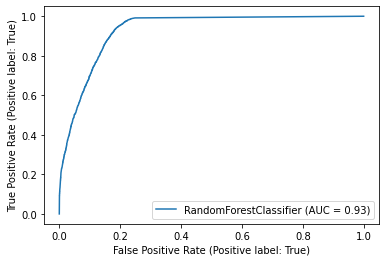

In [539]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RFC5, xTest, yTest) 
plt.show()

In [538]:
# USED ALL OF THESE BUT WITH SIMILAR RESULTS, STILL NO MODEL WITH 0.7+ IN BOTH PRECISION & RECALL SCORES ON TESTING DATASET

# STANDARDIZATION 
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled = scaler.fit_transform(X)
# xTrain, xTest, yTrain, yTest = train_test_split(scaled,Y)

# NORMALIZATION
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaled = scaler.fit_transform(X)
# xTrain, xTest, yTrain, yTest = train_test_split(scaled,Y)

# UNDERSAMPLING
# from imblearn.under_sampling import RandomUnderSampler
# ros = RandomUnderSampler(sampling_strategy="minority")
# xTrain, yTrain = ros.fit_resample(xTrain, yTrain)

# SMOTE
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state = 42)
# xTrain, yTrain = smote.fit_resample(xTrain, yTrain)